In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

from sklearn import ensemble

import xgboost as XGB

In [3]:
data = pd.read_csv("kc_house_data.csv")

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
data = data.drop(['id','date'], axis=1)

In [8]:
fcorr=data.corr()

In [9]:
correlations = fcorr.price
print(correlations)

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64


<Axes: >

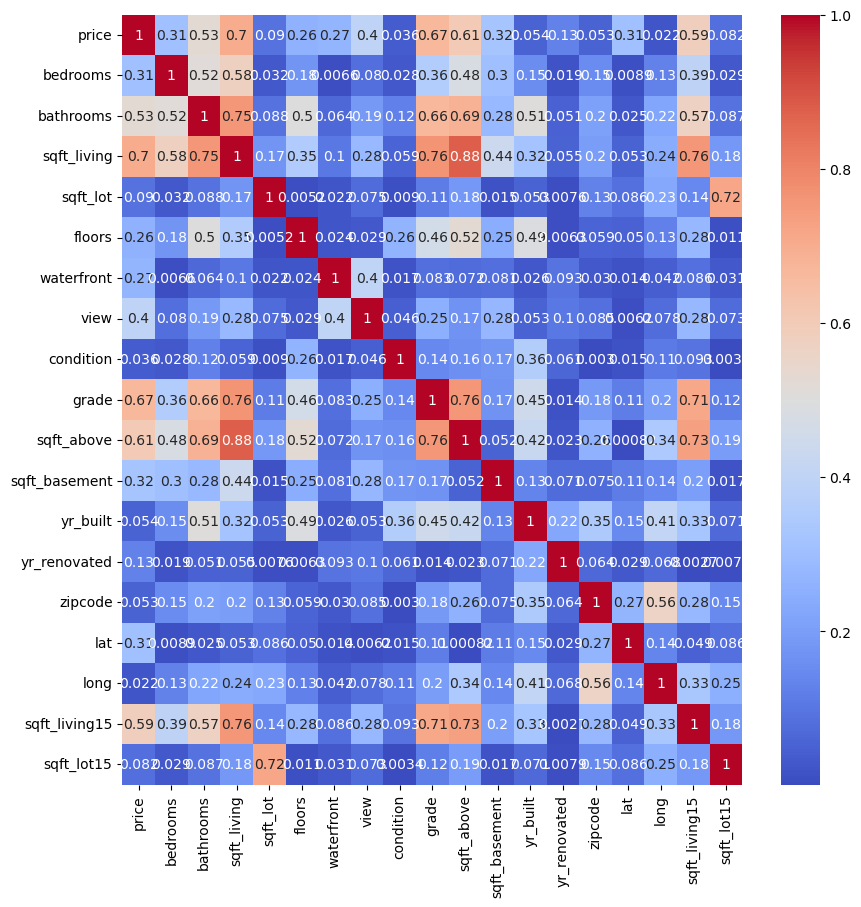

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(fcorr), cmap="coolwarm", annot = True)

In [11]:
correlations = correlations.drop(['price'],axis=0)

In [12]:
print(correlations)

bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64


In [13]:
print(abs(correlations).sort_values(ascending=False))

#inclure les corrélations négatives à l'instar de zipcode

sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
Name: price, dtype: float64


In [14]:
#dans la suite du modèlé, on ne prend que les variables dont la corrélation est supérieure à 0,50

In [15]:
print(data.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [16]:
df=data[['price','sqft_living','grade','sqft_above','sqft_living15','bathrooms']]

In [17]:
df.head()

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms
0,221900.0,1180,7,1180,1340,1.00
1,538000.0,2570,7,2170,1690,2.25
2,180000.0,770,6,770,2720,1.00
3,604000.0,1960,7,1050,1360,3.00
4,510000.0,1680,8,1680,1800,2.00


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   sqft_living    21613 non-null  int64  
 2   grade          21613 non-null  int64  
 3   sqft_above     21613 non-null  int64  
 4   sqft_living15  21613 non-null  int64  
 5   bathrooms      21613 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


Regression linéaire multiple

In [19]:
X = df.drop(['price'], axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [20]:
lm = LinearRegression()
lm.fit(X_train, y_train)            # apprentissage
y_pred = lm.predict(X_test)         # prédiction sur l'ensemble de test

In [21]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))


273318.03909457184


In [22]:
scoreR2 = r2_score(y_test, y_pred)
print(scoreR2)

0.5342875688274699


Regression par forêts aléatoires

In [100]:
X = df.drop(['price'], axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [104]:
rf = ensemble.RandomForestRegressor()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)
print(rf.score(X_test,y_test))

0.6339396886572882


In [106]:
print(np.sqrt(mean_squared_error(y_test, y_rf)))


242318.01532370457


In [112]:
xgb  = XGB.XGBRegressor()
xgb.fit(X_train, y_train)
y_xgb = xgb.predict(X_test)
print(xgb.score(X_test,y_test))

0.5729522409489636


In [114]:
print(np.sqrt(mean_squared_error(y_test, y_xgb)))

261726.44397883466


#Observations
RMSE Randomforest (42318.01532370457) < RMSE XGB (261726.44397883466) < RMSE LinearRegression (273318.03909457184)

R2 Randomforest (0.6339396886572882) < R2 XGB (0.5729522409489636) < R2 LinearRegression (0.5342875688274699)

#conslusion
Le meilleur modèle est Randomforest

Visualisation pour comparaison prédiction et résultats attendus du Randomforest


Text(0.5, 1.0, 'Prix reels vs predictions')

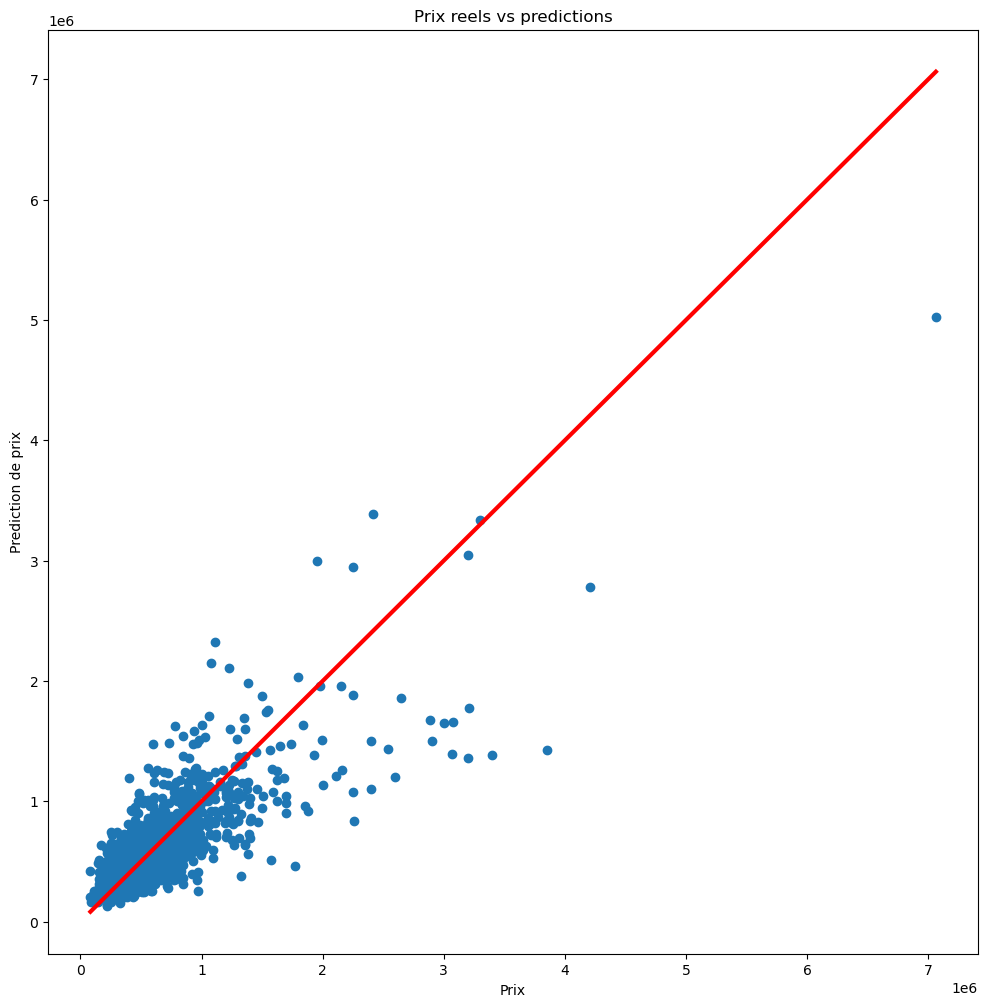

In [116]:
plt.figure(figsize=(12,12))
plt.scatter(y_test, y_rf)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)
plt.xlabel("Prix")
plt.ylabel("Prediction de prix")
plt.title("Prix reels vs predictions")

/tmp/ipykernel_22346/465073911.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_rf)


<Axes: xlabel='price', ylabel='Density'>

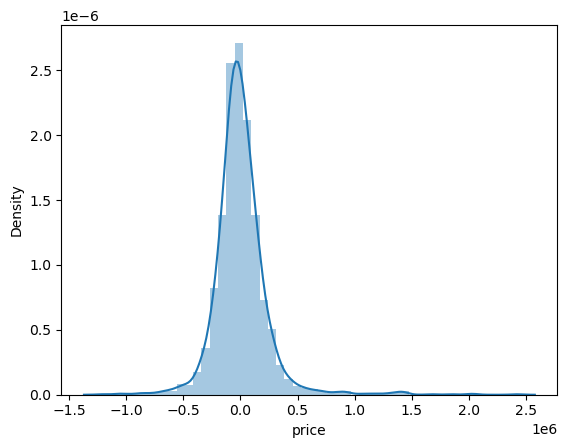

In [118]:
sns.distplot(y_test-y_rf)

In [120]:
print(np.sqrt(mean_squared_error(y_test, y_rf)))


242318.01532370457


In [24]:
import pickle

In [25]:
pickle.dump(lm,open('regmodel.pkl','wb'))